# STA 141B: Homework 4
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:Hemiao 

Last Name: Cui

Student ID: 999470055

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1__ (20 pts)

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [211]:
import requests
import requests_cache
requests_cache.install_cache("mycache") 

In [212]:
def ndb_search(search_item,ds='',group=''):
    """This function takes in search term, ds and food group and returns response from the API"""
    response2=requests.get("https://api.nal.usda.gov/ndb/search/?",params={'format':'json','api_key':'V1ChtuWzNtGLD9oE96p6rauWdfbgwsm1oxJReKYj','q':search_item,'ds':ds,'fg':group}) 
    js=response2.json()
    return js['list']['item']

In [213]:
ndb_search(search_item='quail eggs')

[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2__ (20 pts)

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

### My strategy for searching NDB: 
#### Step1. Modify some food names: there are two cucumbers, two cabbages that I have to distinguish before using food name as search term; also, when searching green collard, no result was obtained. I have to use collard instead. 
#### Step 2. Do the search: Filter out branded using ds='Standard Reference'; Filter through food group; modify the food name by replacing _ with space. 

In [214]:
#Step1
import pandas as pd 
freshfile=pd.read_csv('fresh.csv')
freshfile.loc[freshfile['form'].str.contains('peeled'),'food']='cucumbers peeled'
freshfile.loc[freshfile['form'].str.contains('consumed'),'food']='cucumbers with peel'
freshfile.loc[freshfile['form'].str.contains('green'),'food']='green cabbage'
freshfile.loc[freshfile['form'].str.contains('red'),'food']='red cabbage'
freshfile.loc[freshfile['food'].str.contains('collard'),'food']='collard'
freshfile

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit


In [215]:
#Step2
for index,row in freshfile.iterrows():
    if row[6]=='fruit': #row[6] is food type
        foodgroup='Fruits and Fruit Juices'
    else:
        foodgroup='Vegetables and Vegetable Products'
    try: #row[5] is food name
        ndbnumber=ndb_search(search_item=(row[5].replace('_',' ')+' raw'),ds='Standard Reference',group=foodgroup)[0]['ndbno'] 
    except KeyError: #there is one item that no record can be found using above search term, so for that one, I did not include raw in search term. 
        ndbnumber=ndb_search(row[5].replace('_',' '))[0]['ndbno'] 
    freshfile.loc[index,'NDB No.']=ndbnumber
freshfile

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB No.
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09221
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021


__Exercise 1.3__ (20 pts)

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [216]:
def ndb_report(NDBno):
    """This function take in NDB number and returns the nutrient document for this number"""
    response=requests.get("https://api.nal.usda.gov/ndb/V2/reports",params={'format':'json','api_key':'V1ChtuWzNtGLD9oE96p6rauWdfbgwsm1oxJReKYj','ndbno':NDBno})
    js=response.json()
    nutrient=js['foods'][0]['food']['nutrients']
    return nutrient
ndb_report(NDBno="09279")

[{u'derivation': u'NONE',
  u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit': u'g',
    u'label': u'cup, sliced',
    u'qty': 1.0,
    u'value': u'143.93'},
   {u'eqv': 66.0,
    u'eunit': u'g',
    u'label': u'fruit (2-1/8" dia)',
    u'qty': 1.0,
    u'value': u'57.57'},
   {u'eqv': 151.0,
    u'eunit': u'g',
    u'label': u'NLEA serving',
    u'qty': 1.0,
    u'value': u'131.72'}],
  u'name': u'Water',
  u'nutrient_id': u'255',
  u'unit': u'g',
  u'value': u'87.23'},
 {u'derivation': u'NC',
  u'group': u'Proximates',
  u'measures': [{u'eqv': 165.0,
    u'eunit': u'g',
    u'label': u'cup, sliced',
    u'qty': 1.0,
    u'value': u'76'},
   {u'eqv': 66.0,
    u'eunit': u'g',
    u'label': u'fruit (2-1/8" dia)',
    u'qty': 1.0,
    u'value': u'30'},
   {u'eqv': 151.0,
    u'eunit': u'g',
    u'label': u'NLEA serving',
    u'qty': 1.0,
    u'value': u'69'}],
  u'name': u'Energy',
  u'nutrient_id': u'208',
  u'unit': u'kcal',
  u'value': u'46'},
 {u'derivation': u'N

In [218]:
def getnutrient(NDBno):
    """This function takes in NDB number and returned the dataframe consisting nutrients for this NDB number"""
    temp1=ndb_report(NDBno)
    temp=pd.DataFrame(temp1)
    nutrients=temp.iloc[:,[3,6]]
    nutrients=nutrients.set_index(['name'])
    return nutrients

In [220]:
#below is to append nutrients information to freshfile dataframe
Temp1=getnutrient(next(freshfile.iterrows())[1]['NDB No.'])
for index,row in freshfile.iloc[1:,:].iterrows():
    Temp2=getnutrient(row['NDB No.'])    
    Temp1=Temp1.join(Temp2,rsuffix=row['NDB No.'])
nutricontent=Temp1.T
nutricontent=nutricontent.set_index(freshfile['NDB No.'])
Nutridf=freshfile.join(nutricontent,on='NDB No.')
Nutridf #this dataframe is what obtained after nutrients information is appended to freshfile dataframe. 

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,NDB No.,Water,Energy,...,Vitamin E (alpha-tocopherol),Vitamin D (D2 + D3),Vitamin D,Vitamin K (phylloquinone),"Fatty acids, total saturated","Fatty acids, total monounsaturated","Fatty acids, total polyunsaturated","Fatty acids, total trans",Cholesterol,Caffeine
0,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,91.45,30,...,0.05,0.0,0,0.1,0.016,0.037,0.050,0.000,0,0
1,Fresh1,0.535874,0.510000,0.374786,0.393800,cantaloupe,fruit,09181,90.15,34,...,0.05,0.0,0,2.5,0.051,0.003,0.081,0.000,0,0
2,Fresh1,1.377962,0.740000,0.407855,0.759471,tangerines,fruit,09221,88.90,43,...,0.13,0.0,0,0.0,0.024,0.036,0.040,0.000,0,0
3,Fresh1,2.358808,0.940000,0.319670,0.802171,strawberries,fruit,09316,90.95,32,...,0.29,0.0,0,2.2,0.015,0.043,0.155,0.000,0,0
4,Fresh1,1.827416,0.940000,0.363763,0.707176,plums,fruit,09279,87.23,46,...,0.26,0.0,0,6.4,0.017,0.134,0.044,0.000,0,0
5,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09201,86.34,49,...,NaN,0.0,0,NaN,0.035,0.055,0.060,0.000,0,NaN
6,Fresh1,6.975811,0.960000,0.319670,2.322874,raspberries,fruit,09302,85.75,52,...,0.87,0.0,0,7.8,0.019,0.064,0.375,0.000,0,0
7,Fresh1,2.173590,0.560000,0.341717,1.326342,pomegranate,fruit,09286,77.93,83,...,0.60,0.0,0,16.4,0.120,0.093,0.079,0.000,0,0
8,Fresh1,0.627662,0.510000,0.363763,0.447686,pineapple,fruit,09266,86.00,50,...,0.02,0.0,0,0.7,0.009,0.013,0.040,0.000,0,0
9,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021,86.35,48,...,0.89,0.0,0,3.3,0.027,0.170,0.077,0.000,0,0


__Exercise 1.4__ (20 pts) Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
col=Nutridf.columns[[0,5,6,7]]
leftcol=Nutridf.columns.drop(col)#these are columns that remain their data types.
Nutridf.loc[:,leftcol]=Nutridf.loc[:,leftcol].apply(pd.to_numeric)

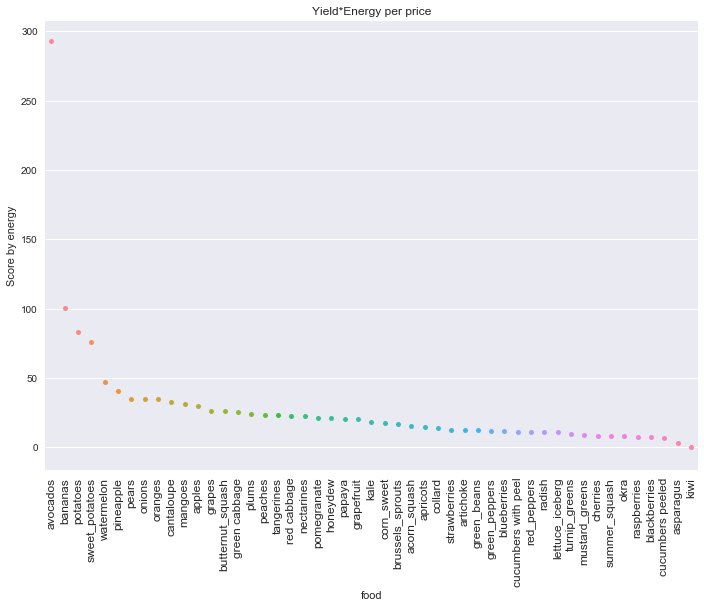

In [222]:
#Below is to calculate: energy*yield/price as score for each food (using energy as the single indicator for nutrition). 
Nutridf['energyscore']=Nutridf['Energy']*Nutridf['yield']/Nutridf['price_per_lb']
Nutridf_sort=Nutridf.sort_values(by="energyscore",ascending=False)
ax = sns.stripplot(x=Nutridf_sort['food'],y=Nutridf_sort["energyscore"]) 
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=12)
ax.set(title = "Yield*Energy per price", ylabel = "Score by energy")
plt.show() 

### Above plot showed that when using energy as the only nutrition indicator, avocadoes and bananas ranked the top for their nutrition and yield combination given price. 

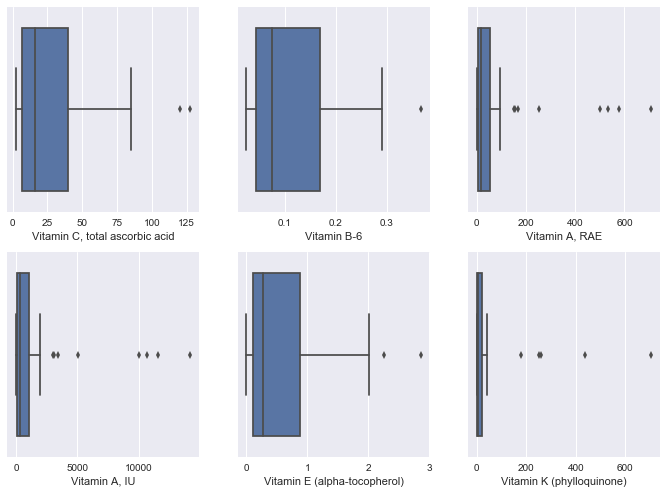

In [223]:
vitamincol=['D' not in item and 'Vitamin'in item and not 'B-12' in item for item in Nutridf.columns.values]#slice vitamins, but not vitamin D and B12 because vitamin D and B12 does not have much data for all foods; 
Vitamindata=Nutridf.loc[:,vitamincol].dropna()
f, axes = plt.subplots(2, 3)
for item in xrange(len(Vitamindata.columns)-3):
    axes[1]=Vitamindata.iloc[:,item],ax=axes[0,item])
for item in xrange(len(Vitamindata.columns)-3):
    sns.boxplot(Vitamindata.iloc[:,item+3],ax=axes[1,item])

### Because vitamins are among the key nutrients in fruits and vegetables, I did boxplot trying to understand whether there is a type of vitamin that has a large variation in terms of value, which can then be used as nutrition indicator. But, the result above showed that large variations occured in almost all vitamins.

In [224]:
import numpy as np
Nutridf1=Nutridf.dropna()
Nutridf1=Nutridf1.drop(['Cholesterol','Caffeine','Fatty acids, total trans','Vitamin B-12','Vitamin D','Vitamin D (D2 + D3)','Water'],axis=1)
Nutridf1=Nutridf1.reset_index(drop=True)

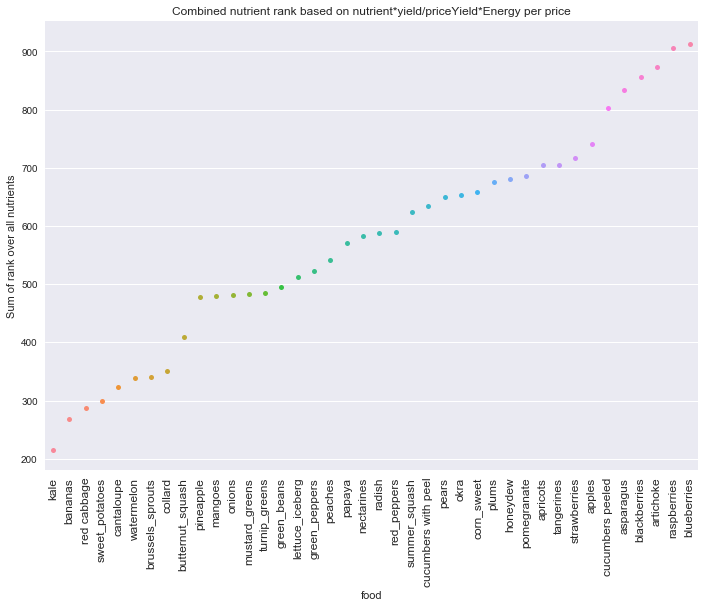

In [225]:
Nutridf1['nrank']=pd.Series(np.zeros(Nutridf1.shape[0]))
for index,item in Nutridf1.iloc[:,8:].iteritems():
    Tempscore=item*Nutridf1['yield']/Nutridf1['price_per_lb']
    vrank1=Tempscore.rank(ascending=False)
    Nutridf1['nrank']=Nutridf1['nrank']+vrank1
Nutridf1_sort=Nutridf1.sort_values(by='nrank',ascending=True)
ax = sns.stripplot(x=Nutridf1_sort['food'],y=Nutridf1_sort["nrank"]) 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize=12)
ax.set(title = "Combined nutrient rank based on nutrient*yield/priceYield*Energy per price", ylabel = "Sum of rank over all nutrients")
plt.show()

### In above plot, I calculated nutrient value* yield/price for all selected nutrients and then ranked all foods (NAs have been removed earlier) based on the calculated value. Then, I summed up the rank for all selected nutrients. The sum of rank of was plotted, which showed the final winner for all foods are kale, bananas and red cabbage. 